In [1]:
#Step 1 – Load and Prepare the Dataset
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000   # Use the top 10,000 most-frequent words
maxlen = 200           # Pad or trim every review to 200 words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print("Training samples:", len(x_train))
print("Testing samples :", len(x_test))

# Pad the sequences so that all reviews have equal length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test  = sequence.pad_sequences(x_test,  maxlen=maxlen)

print("x_train shape:", x_train.shape)
print("x_test  shape:", x_test.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step
Training samples: 25000
Testing samples : 25000
x_train shape: (25000, 200)
x_test  shape: (25000, 200)


In [5]:
#Step 2 – Build the GRU Model
from tensorflow import keras
from tensorflow.keras import layers

model_gru = keras.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=128),  
    layers.GRU(128, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(1, activation='sigmoid')
])

model_gru.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
#Step 3 – Compile the Model
model_gru.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [9]:
#Step 4 – Train the Model
history_gru = model_gru.fit(
    x_train, y_train,
    epochs=3,
    batch_size=32,
    validation_data=(x_test, y_test)
)

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 187s 232ms/step - accuracy: 0.7531 - loss: 0.5092 - val_accuracy: 0.8051 - val_loss: 0.4247
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 184s 236ms/step - accuracy: 0.8540 - loss: 0.3478 - val_accuracy: 0.8608 - val_loss: 0.3387
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 253ms/step - accuracy: 0.8998 - loss: 0.2484 - val_accuracy: 0.8763 - val_loss: 0.3028


In [10]:
#Step 5 – Evaluate the Model
test_loss, test_acc = model_gru.evaluate(x_test, y_test, verbose=2)
print(f"\nGRU Test Accuracy: {test_acc:.4f}")

782/782 - 33s - 42ms/step - accuracy: 0.8763 - loss: 0.3028

GRU Test Accuracy: 0.8763


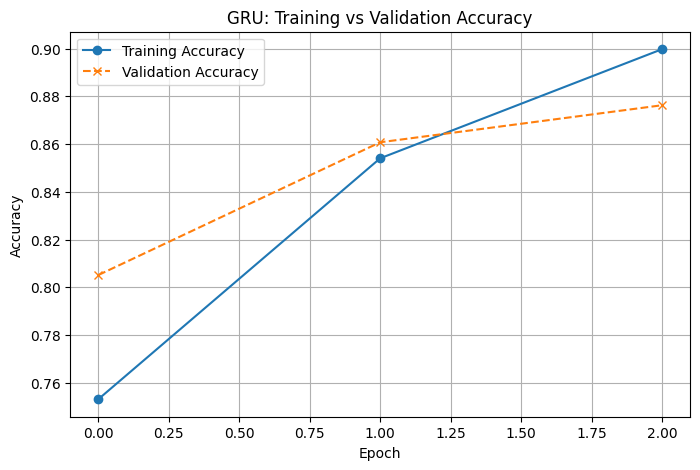

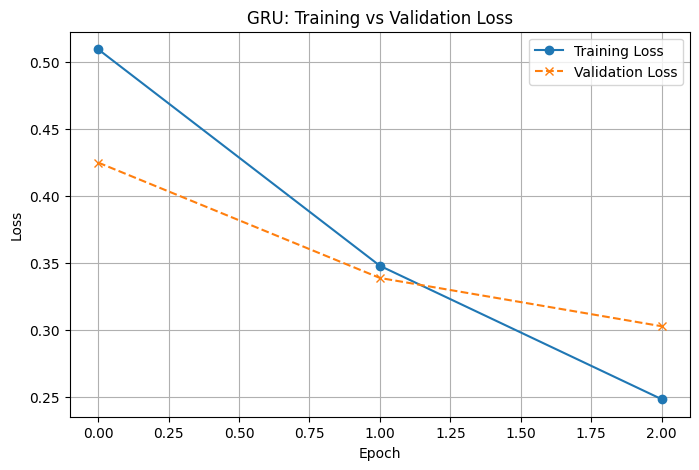

In [11]:
#Step 6 – Plot Training vs Validation Curves
import matplotlib.pyplot as plt

# Accuracy curve
plt.figure(figsize=(8,5))
plt.plot(history_gru.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy', linestyle='--', marker='x')
plt.title('GRU: Training vs Validation Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend(); plt.grid(True); plt.show()

# Loss curve
plt.figure(figsize=(8,5))
plt.plot(history_gru.history['loss'], label='Training Loss', marker='o')
plt.plot(history_gru.history['val_loss'], label='Validation Loss', linestyle='--', marker='x')
plt.title('GRU: Training vs Validation Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.legend(); plt.grid(True); plt.show()